# Section 14: KNN - K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Binary Classification with K-Nearest Neighbor

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

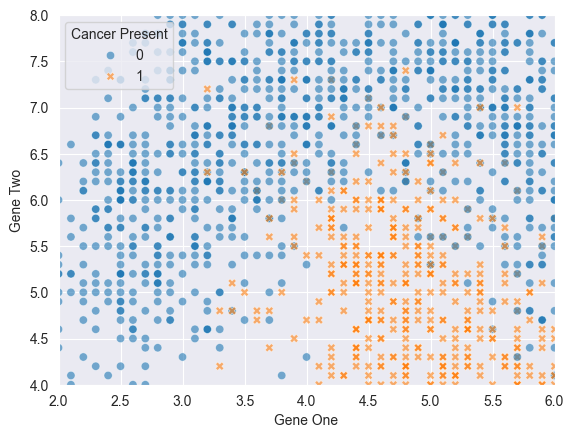

In [4]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')

plt.xlim(2, 6)
plt.ylim(4, 8)

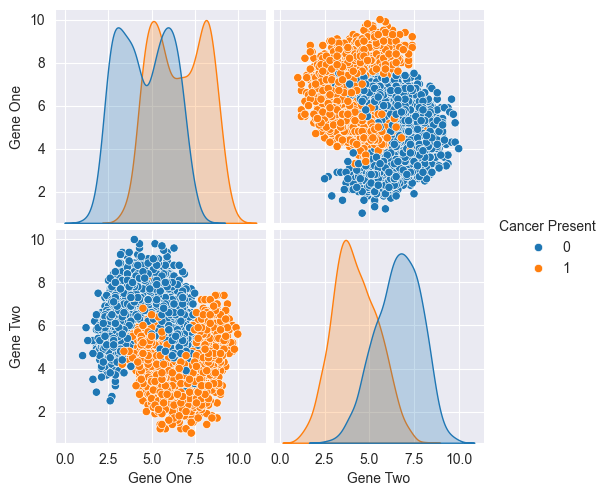

In [5]:
sns.pairplot(df, hue='Cancer Present')

In [6]:
X = df.drop('Cancer Present', axis=1)

In [7]:
y = df['Cancer Present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)

In [11]:
scaled_X_test = scaler.transform(X_test)

In [12]:
model = KNeighborsClassifier(n_neighbors=1)

In [13]:
model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = model.predict(scaled_X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[424,  46],
       [ 49, 381]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [17]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

## Choosing K

In [18]:
test_error_rates = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(scaled_X_train, y_train)
    
    y_pred = model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(test_error)

In [19]:
test_error_rates

[0.10555555555555551,
 0.09999999999999998,
 0.07444444444444442,
 0.07777777777777772,
 0.07222222222222219,
 0.06666666666666665,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.05777777777777782,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

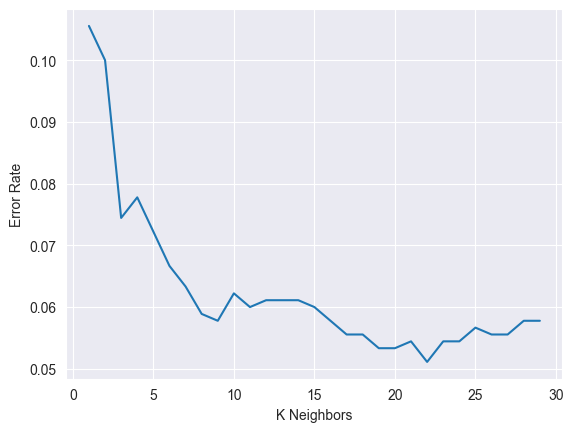

In [20]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [21]:
scaler = StandardScaler()

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations = [('scaler', scaler), ('knn', knn)]

In [25]:
pipe = Pipeline(operations)

In [26]:
k_values = list(range(1, 20))

In [27]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [28]:
param_grid = {
    'knn__n_neighbors': k_values,
}

In [29]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [30]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [31]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [32]:
y_pred = full_cv_classifier.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [34]:
new_patient = pd.DataFrame([[3.8, 6.4]], columns=['Gene One', 'Gene Two'])

In [35]:
full_cv_classifier.predict(new_patient)

array([0])

In [36]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])

## Exercises

In [37]:
df = pd.read_csv('sonar.all-data.csv')

In [38]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<AxesSubplot: >

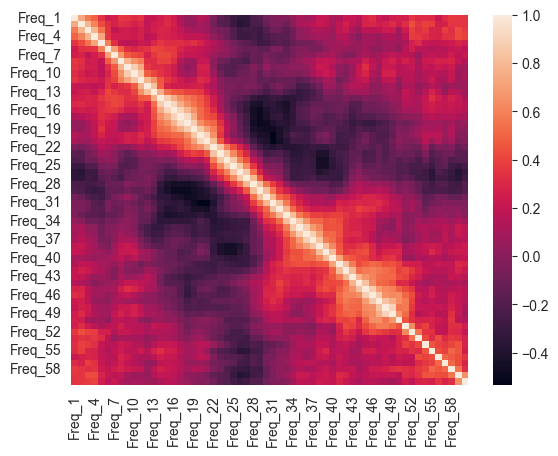

In [39]:
sns.heatmap(df.corr(numeric_only=True))

In [40]:
df['Label'] = df['Label'].map({ 'R': 0, 'M': 1 })

In [41]:
np.abs(df.corr()['Label']).nlargest(6)

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

In [42]:
X = df.drop('Label', axis=1)

In [43]:
y = df['Label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
scaler = StandardScaler()

In [46]:
knn = KNeighborsClassifier()

In [47]:
operations = [('scaler', scaler), ('knn', knn)]

In [48]:
pipe = Pipeline(operations)

In [49]:
param_grid = {
    'knn__n_neighbors': list(range(1, 30)),
}

In [50]:
full_cv_classifier = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [51]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [52]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [53]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00294867, 0.00241923, 0.00230608, 0.00225215, 0.00223274,
        0.00225358, 0.0023324 , 0.00244122, 0.00254078, 0.00230503,
        0.00224047, 0.00220075, 0.00232139, 0.00227165, 0.0022347 ,
        0.00237432, 0.00256896, 0.0023797 , 0.00239582, 0.00228062,
        0.00225081, 0.00225677, 0.00240431, 0.0024045 , 0.00225558,
        0.00230246, 0.0023006 , 0.00221729, 0.00225453]),
 'std_fit_time': array([4.86523909e-04, 2.06594067e-04, 1.18321508e-04, 8.22683544e-05,
        2.67251807e-05, 1.13349859e-04, 5.96060562e-05, 1.46673467e-04,
        2.16866693e-04, 1.19388350e-04, 4.16708754e-05, 1.17708293e-05,
        1.08844868e-04, 1.09115200e-04, 7.12754326e-05, 9.33540239e-05,
        3.65785915e-04, 2.45007655e-04, 1.79565719e-04, 1.11032185e-04,
        7.17139307e-05, 1.38317186e-04, 1.51979650e-04, 1.73822443e-04,
        6.21823079e-05, 1.41860008e-04, 8.85803282e-05, 5.86651188e-05,
        1.16245564e-04]),
 'mean_score_time': array([0.01333513, 

<AxesSubplot: >

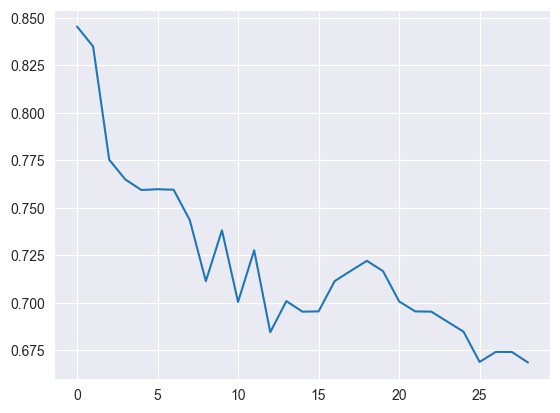

In [54]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

In [55]:
y_pred = full_cv_classifier.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1],
       [ 1, 12]])

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

